# Spectral Analysis for Zabuyelite

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm
import swordfish as sf
from WIMpy import DMUtils as DMU

# rc('text', usetex=True)
# rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
# rc('font',**{'family':'serif','serif':['cmr']})
%matplotlib inline

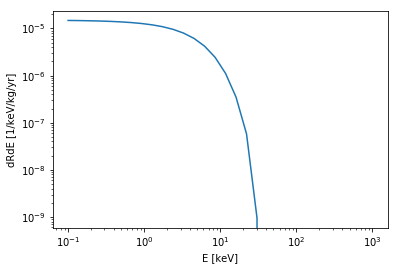

In [4]:
# Zabuyelite is Li2CO3 therefore we need to some over several elements to get the signal

def dRdE_Zab(E, sigma, m):
    # E in keV
    # sigma in cm^2
    # mass in GeV
    # Here we give the number of protons and neutrons in lithium, carbon, and oxygen
    # in that order
    Zab_abun = np.array([0.189,0.162,0.649])
    Zab_p = np.array([3,6,8])
    Zab_n = np.array([4,6,8])
    dRdE = np.zeros_like(E)
    for i, ratio in enumerate(Zab_abun):
        dRdE += DMU.dRdE_standard(E, Zab_p[i], Zab_n[i], m, sigma)
    return dRdE

E_list = np.logspace(-1, 3, 30) # keV
dRdE = dRdE_Zab(E_list, 1e-45, 10)
plt.loglog(E_list,dRdE)
plt.ylabel("dRdE [1/keV/kg/yr]")
plt.xlabel("E [keV]")
plt.show()

Now we need to know the spectra as a function of track length, I'll use the SRIM code and load in the tables